### 2. 용어
   #### 1) Feature, Label
   feature는 label을 가지고 있다.

   ML에 feature를 입력으로, 학습시키면 target 또는 label을 출력으로, 결과가 나온다.
   
   (feature를 바탕으로 계속 학습)


>  ※ 지도학습 & 비지도학습
   
   - 지도학습 : feature에 label이 있어서 이를 바탕으로 학습
  
   - 비지도학습 : feature에 대한 label도 없음 (grouping으로 학습, 정확한 값보다는 어떤 group에 속하는지 알려줌)

   #### 2) Bunch Class
      속성
- data (necessary) : 독립변수 ndarray 배열
- target (necessary) : 종속변수 ndarray 배열
- feature_names (option) : 독립 변수 이름 리스트
- target_names (option) : 종속 변수 이름 리스트
- DESCR (option) : 자료에 대한 설명 


In [1]:
from sklearn.datasets import load_iris
from IPython.display import HTML

data = load_iris()

print(type(data))
print(dir(data))
print(data.feature_names)

print(HTML(data.DESCR.replace('\n', '<br/')))

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<IPython.core.display.HTML object>


(1797, 8, 8)
[0 1 2 ... 8 9 8]


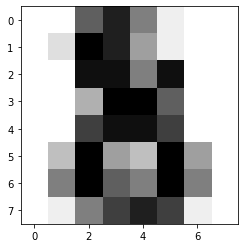

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

print(digits.images.shape)
print(digits.target)
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

#### 외부에서 데이터 가져오기

In [3]:
import os
import tarfile

import pandas as pd
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handsonml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()

housing = load_housing_data()
housing.head()
housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()

ModuleNotFoundError: No module named 'pandas'

### 3. 데이터 전처리
#### 1) 정의
현실에서 가져오는 raw 데이터의 품질을 보완하는 작업들
#### 2) 주요 작업
- 데이터 정제
    
    결측값(missing value)을 채우거나, 잡음값(noisy data)을 평활화(smoothing), 이상치(outlier) 발견하여 제거, 불일치 해결

- 데이터 통합

    다수의 소스에서 얻은 데이터를 합쳐서 표현

- 축소
 
    크기는 작지만 분석 결과는 동일한 데이터로 표현

- 변환

    기계학습 알고리즘의 효율성을 극대화하기 위한 변형
#### 3) 표준화
자료에 선형 변환을 적용해 전체 자료를 평균 0, 분산 1이 되도록 만드는 과정

자료의 overflow나 underflow를 방지하기 위해 만듦

> 관련 함수
  - scale(x)
    
    표준 정규 분포 스케일
  - robust_scale(x)
  - minmax_scale(x)
  - maxabs_scale(x)
#### 4) 정규화
개별 데이터의 크기를 모두 같게 만들기 위한 변환

다차원 독립변수 벡터가 있을 대, 각 벡터 원소들의 상대적인 크기만 중요한 경우에 사용

ex. 크기가 다른 나이 데이터셋(0~100)과 수입(0~1000000000,,,)의 데이터셋의 비교를 가능하게 만듦
#### 5) 사용자 정의 변환




### 머신러닝과 통계학과의 관계
• 데이터를 수집하고 분석해 컴퓨터에게 학습 시키는 과정

• 새로운 입력값에 대해 결과를 예측하는 과정에 확률 이론을 활용
#### 기계학습에서 통계적인 방법
• 상관관계분석

• 회귀분석

• 확률분석

#### 상관분석
• 두 변수간의 관계의 강도(얼마나 밀접하게 유지되어 있는 지)를 분석하는 것
##### 상관계수(correlation coefficient) r
• 상관계수 r의 범위 : -1 ≤ r ≤ 1
• Pearson’s correlation을 주로 사용
- Pandas의 corr()함수
- 수식
        측정값(x, y)에 대하여 n개의 측정값 (x1, y1),(x2,y2),…(xn, yn) 이 주어졌을 때
        (𝑥ҧ, 𝑦ത: 각각 x, y의 평균 값
        𝑆𝑥 , 𝑆𝑦 ∶ 각각 x, y의 표준편차)
        
        𝑟 = sigmaNi=1 (𝑥𝑖−𝑥ҧ)(𝑦𝑖−𝑦ത) / (𝑛−1)𝑆𝑥𝑆𝑦

⬇️ 위 상관계수 r의 수식을 코드로 표현

In [ ]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random num generator